In [335]:
import warnings
warnings.filterwarnings('ignore')

In [336]:
pip install pyecharts

In [337]:
pip install chart_studio

In [338]:
import pyecharts

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator
import seaborn as sns
from datetime import datetime
from matplotlib import font_manager, rc

from pyecharts.charts import Bar
from pyecharts.charts import Line

In [340]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Ethereum.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/OMG.csv'

-rw------- 1 root root 75337 Nov 15 08:31 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
-rw------- 1 root root 17367 Nov 15 09:47 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'
-rw------- 1 root root 24702 Nov 16 07:18 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin.csv'
-rw------- 1 root root 30724 Nov 16 07:33 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Ethereum.csv'
-rw------- 1 root root 26458 Nov 16 07:59 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/OMG.csv'


In [342]:
DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv')
# DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv')
# DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin.csv')
# DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Ethereum.csv')
DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/OMG.csv')

In [343]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2662 non-null   object 
 1   coin_name  2662 non-null   object 
 2   num        2662 non-null   int64  
 3   s          2662 non-null   float64
 4   lang       2662 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 104.1+ KB


In [344]:
DF.groupby('coin_name')['coin_name'].count()

coin_name
ada     253
bch     227
btc     298
doge    164
eos      41
eth     346
omg     526
snt     742
xrp      65
Name: coin_name, dtype: int64

In [352]:
# DF_bch = DF[DF['coin_name'] == 'bch']
# DF_bch = DF[DF['coin_name'] == 'btc']
DF_bch = DF[DF['coin_name'] == 'omg']

In [353]:
DF_bch

,date,coin_name,num,s,lang
1,2016-05-31,omg,1,0.000000,kor
48,2018-04-13,omg,11,0.000000,kor
50,2018-04-14,omg,1,0.000000,kor
53,2018-04-16,omg,3,0.000000,kor
55,2018-04-17,omg,3,0.000000,kor
...,...,...,...,...,...
2628,2021-11-08,omg,3,0.666667,kor
2636,2021-11-09,omg,3,0.666667,kor
2643,2021-11-10,omg,4,0.500000,kor
2651,2021-11-11,omg,9,0.777778,kor


In [354]:
DF_bch = DF_bch.reset_index(drop=True)

In [355]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      377 non-null    object 
 1   Price     377 non-null    float64
 2   Open      377 non-null    float64
 3   High      377 non-null    float64
 4   Low       377 non-null    float64
 5   Vol.      377 non-null    object 
 6   Change %  377 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.7+ KB


In [356]:
DF_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 12, 2021",13.0270,16.9175,16.9175,12.3566,113.64M,-23.32%
1,"Nov 11, 2021",16.9878,15.1945,19.0021,15.0920,72.55M,11.72%
2,"Nov 10, 2021",15.2061,16.4221,17.2558,14.7514,33.87M,-7.49%
3,"Nov 09, 2021",16.4374,17.4746,17.7703,16.0632,44.44M,-5.92%
4,"Nov 08, 2021",17.4720,16.4333,17.8849,15.5675,33.49M,6.22%


In [357]:
DF_price['Price'][178]

8.6763

In [358]:
DF_price['Price'][178] = DF_price['Price'][178].replace(',','')

AttributeError: ignored

In [ ]:
DF_price['Price'][178]

'3377.55'

In [ ]:
for i in range(len(DF_price['Price'])):
  DF_price['Price'][i] = DF_price['Price'][i].replace(',','')



In [ ]:
DF_price['Price'][178]

'3377.55'

In [ ]:
DF_price['Price'][178] = pd.to_numeric(DF_price['Price'][178], downcast = 'float')

In [ ]:
type(DF_price['Price'][179])

str

In [ ]:
for i in range(len(DF_price['Price'])):
  DF_price['Price'][i] = pd.to_numeric(DF_price['Price'][i], downcast = 'float')

In [359]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      377 non-null    object 
 1   Price     377 non-null    float64
 2   Open      377 non-null    float64
 3   High      377 non-null    float64
 4   Low       377 non-null    float64
 5   Vol.      377 non-null    object 
 6   Change %  377 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.7+ KB


In [360]:
date_time_obj = datetime.strptime(DF_price['Date'][0], '%b %d, %Y')
date_time_obj

datetime.datetime(2021, 11, 12, 0, 0)

In [361]:
date_time_obj.strftime("%Y-%m-%d")

'2021-11-12'

In [362]:
DF_price.iloc[0]

Date        Nov 12, 2021
Price             13.027
Open             16.9175
High             16.9175
Low              12.3566
Vol.             113.64M
Change %         -23.32%
Name: 0, dtype: object

In [363]:
A = []
for i in range(246):
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  A.append(a)

In [364]:
B = []
for i in range(246):
  x = DF_price['Price'][i]
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  Y = [a,x]
  B.append(Y)
DF_B = pd.DataFrame(B)
DF_B.columns = ['date','price']

In [ ]:
# for i in DF_B['date']:
#   for j in DF_bch['date']:
#     if i == j:
#       print('매치', i, j)


In [365]:
C = []
for i in range(len(DF_B)):
  for j in range(len(DF_bch)):
    if DF_B['date'][i] == DF_bch['date'][j]:
      # print('매치', i, j , DF_B['date'][i], DF_bch['date'][j], DF_B['price'][i], DF_bch['s'][j])
      a = DF_B['date'][i]
      b = DF_B['price'][i]
      c = DF_bch['s'][j]
      d = DF_bch['num'][j]
      Y = [a,b,c,d]
      C.append(Y)
      
DF_bch_F = pd.DataFrame(C)
DF_bch_F.columns = ['date','price','s','num']

In [366]:
DF_bch_F

,date,price,s,num
0,2021-11-12,13.0270,0.333333,3
1,2021-11-11,16.9878,0.777778,9
2,2021-11-10,15.2061,0.500000,4
3,2021-11-09,16.4374,0.666667,3
4,2021-11-08,17.4720,0.666667,3
...,...,...,...,...
209,2021-03-16,5.1821,0.000000,1
210,2021-03-15,5.0270,0.000000,1
211,2021-03-14,5.0855,0.000000,2
212,2021-03-13,5.3270,1.000000,1


In [ ]:
# DF_bch_F.sort_values(by = 'date', axis = 0,ascending=True)
# # DF_bch_F = DF_bch_F.reset_index(drop=True)

In [ ]:
# DF_bch_F = DF_bch_F.reset_index( inplace=True)

In [367]:
y_values = DF_bch_F['s']

In [368]:
z_values = DF_bch_F['price']

In [369]:
x_values = DF_bch_F['date']	

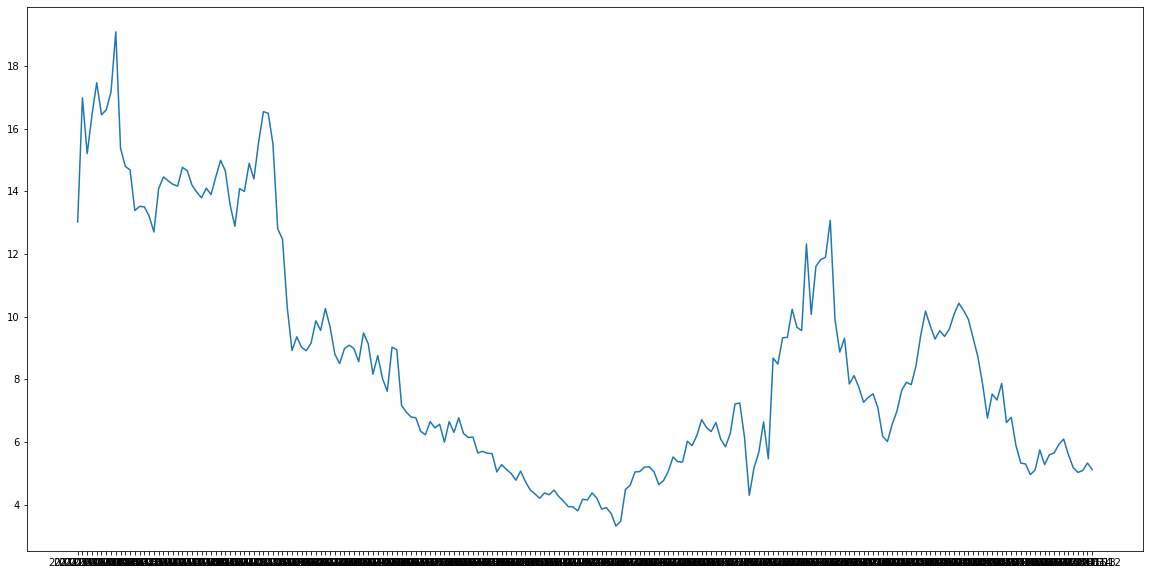

In [370]:
ax = plt.plot(x_values,z_values)
plt.show()

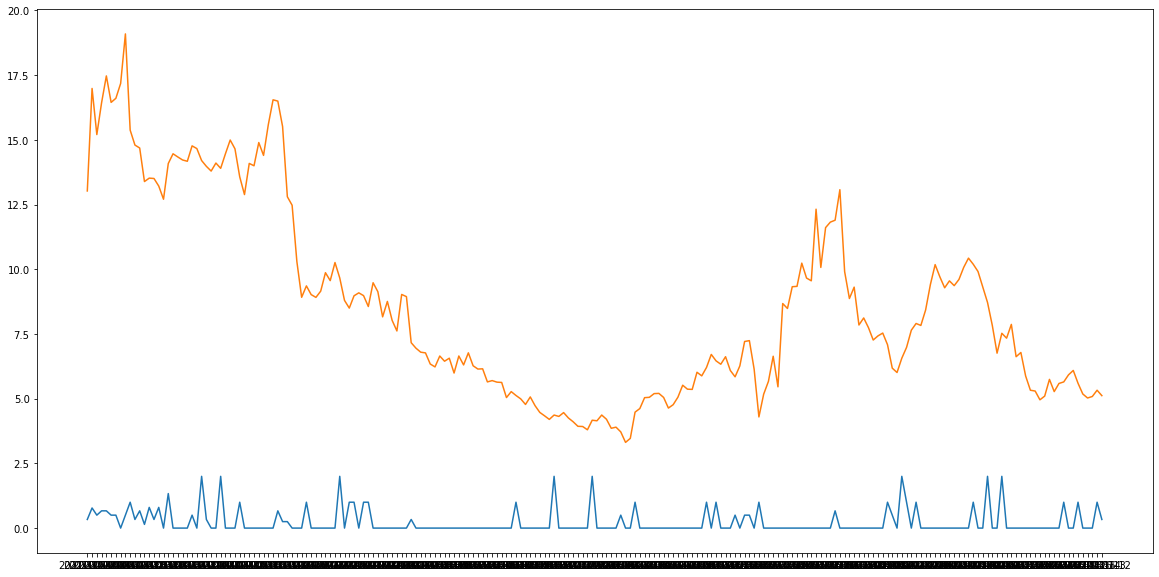

In [371]:
plt.figure(figsize=(20,10))

x_values = DF_bch_F['date']	
y_values = DF_bch_F['s']
z_values = DF_bch_F['price']
plt.plot(x_values, y_values)	
plt.plot(x_values, z_values)

plt.show()

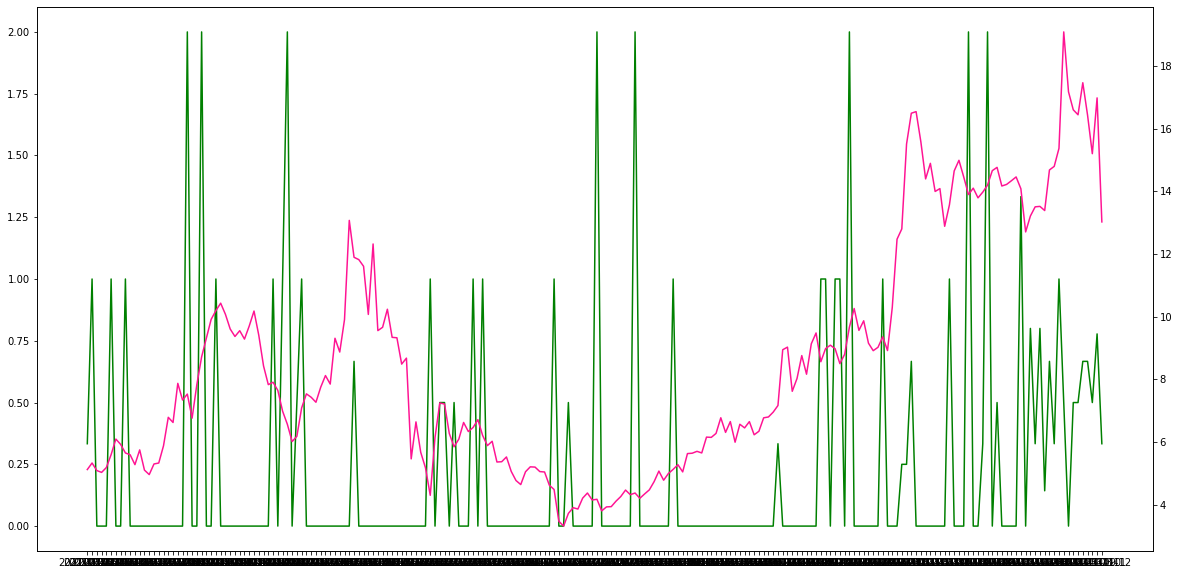

In [372]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax1 = plt.subplots()
ax1.plot(x_values, y_values , color = 'green')

ax2 = ax1.twinx()
ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.show()

In [373]:
import plotly.offline as plyo
import cufflinks

In [374]:
DF_bch_F1 = DF_bch_F.set_index("date")

In [375]:
DF_bch_F1

,price,s,num
date,,,
2021-11-12,13.0270,0.333333,3
2021-11-11,16.9878,0.777778,9
2021-11-10,15.2061,0.500000,4
2021-11-09,16.4374,0.666667,3
2021-11-08,17.4720,0.666667,3
...,...,...,...
2021-03-16,5.1821,0.000000,1
2021-03-15,5.0270,0.000000,1
2021-03-14,5.0855,0.000000,2


In [376]:
DF_bch_F1 ['s'] = -1*(DF_bch_F1['s']-1)*(DF_bch_F1['num'])*5

In [377]:
plyo.iplot(DF_bch_F1.iplot(asFigure=True))

In [378]:
DF_bch_x = DF_bch_F1

In [379]:
for i in range(len(DF_bch_F1)):
  if DF_bch_F1['num'][i] <= 5 :
    DF_bch_x['s'][i] = 0
    # print('yes')
  # else :
  #   # print('no')


In [380]:
plyo.iplot(DF_bch_x.iplot(asFigure=True))

In [ ]:
# x_values = DF_bch_Fx2['date']	
# y_values = DF_bch_Fx2['s']
# z_values = DF_bch_Fx2['price']

# plt.rcParams['figure.figsize'] = (20, 10)
# fig, ax1 = plt.subplots()
# ax1.plot(x_values, y_values , color = 'green')

# ax2 = ax1.twinx()
# ax2.invert_xaxis()
# ax2.plot(x_values, z_values , color = 'deeppink')

# plt.show()